# Lending Club - Loan Repayment Prediction Model - Final Report

## Introduction
The goal of each and every business is to make profit.  For a lender profit depends on whether or not the borrower repays the principal as well as interest.  Without repayment the lender will incur a loss and that loss can even potentially be greater than the initial loan amount when lawyer, court and collection fees are taken into consideration.  Therefore, it is critically important for a lender to be able to identify whether a potential borrower can and will make all of his or her loan payments.  The purpose of this project is to identify the characteristics (limited to those found in the dataset) of persons who are likely to default on their loans and provide a simple framework for borrowers to make such a distinction.  In order to make predictions on which potential borrower is or isn’t likely to default, binary classification predictive models will be created using a variety of machine learning algorithms.  The framework for lenders to make predictions concerning potential borrowers will come in the form of a decision tree.  

## Literature Review

**Benchmarking state-of-the-art classification algorithms for credit scoring: A ten-year update**

http://www.business-school.ed.ac.uk/waf/crc_archive/2013/42.pdf

Essentially this paper is a modern update to the landmark benchmarking study of classification algorithms for credit scoring by Baesens, Van Gestel, Viaene, Stepanova, Suykens and Vanthienen in 2003.  Since 2003 many new techniques and algorithms have been developed in predictive modeling.  This paper builds upon Baesens et al. by including all of the newer state-of-the-art techniques as well as those covered in the previous study.
I chose this paper because its goal of comparing of classification algorithms for credit scoring is highly related to the problem this project aims to solve.  The paper describes a vector x of m dimensions with each dimension as a feature characterizing an application for a credit products such as a loan.  It then goes on to discuss a binary response variable which indicates the existence or non-existence of a default event.  The probability of a default event given x is the classification problem being addressed in the study.  Finally, a decision maker will take this probability and if it falls under a given threshold the application will be accepted, otherwise it will be rejected.  This is essentially the approach I am taking for this capstone project.  The Lending Club data set I am using for this project contains over 100 features characterizing the borrower, my vector x.  The data set also contains a feature stating the current status of the loan with various possible values that can easily be grouped into default or non-default statuses.  This is effectively my binary response variable described in the study.  Finally my goal is to estimate the probability of default given a set of borrower characteristics and use that to determine whether they are likely or unlikely to default.  Again, this is parallel to the study.
The study considered the following classification algorithms.
<img src="images\algorithms1_1.png" style="width: 600px;"/>
<img src="images\algorithms2.png" style="width: 600px;"/>

The following table measures the performance of each algorithm in credit scoring classification using Area Under a ROC Curve (AUC).  According to the study across all performance measures the top three most accurate classifiers are Random Forests, Bagged (MLP) Neural Networks, and Bagged Decision Trees.
<img src="images\auc_table.png" style="width: 600px;"/>


**An Empirical Comparison of Supervised Learning Algorithms**

https://www.cs.cornell.edu/~caruana/ctp/ct.papers/caruana.icml06.pdf

This study compares the performance of eight machine learning algorithms namely, SVMs, neural nets, logistic regression, naïve bayes, memory based learning, random forests, decision trees, bagged trees, boosted trees, and boosted stumps.  The performance metrics used are, accuracy, F-score, Lift, ROC Area, average precision, squared error and cross entropy.  The study concludes that bagged trees, random forests and neural nets have the best average performance (prior to calibration) over all the metrics and over all the problems.  When calibration is taken into account, the overall best performing algorithm is boosted decision trees (calibrated).  In close second is Random forests, followed by bagged decision trees (uncalibrated). 
<img src="images\study2.png" style="width: 600px;"/>

**Conclusion**

I was fascinated to discover that from both of the studies I researched, ensemble methods were generally the best performers.  I was also pleasantly surprised to find that in both studies, the top three performing algorithms were almost identical.  According to Benchmarking state-of-the-art classification algorithms for credit scoring: A ten-year update, the top three classifiers were Random Forests, Bagged (MLP) Neural Networks, and Bagged Decision Trees.  Meanwhile according to An Empirical Comparison of Supervised Learning Algorithms, the top three are Boosted Decision Trees, Random Forests and Bagged Decision Trees. In both studies Random Forests and Bagged Decision Trees come out on top.  It’s important to note that An Empirical Comparison of Supervised Learning Algorithms did not include Bagged Neural Networks.  Given the agreement among both studies I have decided to use Random Forests, Bagged (MLP) Neural Networks, and Bagged Decision Trees for this project.  
In addition to selecting classification algorithms, metrics for measuring the performance of said algorithms are required.  Given the similarities of the goals of my project and the aims of Benchmarking state-of-the-art classification algorithms for credit scoring: A ten-year update, I have decided to use some of its performance measures.  Specifically, Percentage Correctly Classified (PCC), and the area under a ROC curve (AUC).


#### Install all required packages

In [18]:
#install.packages("caret", repos='http://cran.us.r-project.org',dependencies = TRUE)
install.packages("ggplot2", repos='http://cran.us.r-project.org',dependencies = TRUE)
install.packages("psych", repos='http://cran.us.r-project.org',dependencies = TRUE)
install.packages("gmodels", repos='http://cran.us.r-project.org',dependencies = TRUE)
install.packages("party", repos='http://cran.us.r-project.org',dependencies = TRUE)
#install.packages("e1071", repos='http://cran.us.r-project.org',dependencies = TRUE)
install.packages("unbalanced", repos='http://cran.us.r-project.org',dependencies = TRUE)
install.packages("hmeasure", repos='http://cran.us.r-project.org',dependencies = TRUE)
install.packages("pROC", repos='http://cran.us.r-project.org',dependencies = TRUE)
install.packages("adabag", repos='http://cran.us.r-project.org',dependencies = TRUE)
library(caret)
library(psych)
library(lattice)
library(party)
library(unbalanced)
#library(hmeasure)
library(pROC)

Warning message:
"package 'ggplot2' is in use and will not be installed"Warning message:
"dependencies 'graph', 'Rgraphviz' are not available"

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ethan\AppData\Local\Temp\Rtmp6HLphQ\downloaded_packages


Warning message:
"package 'gmodels' is in use and will not be installed"

package 'party' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ethan\AppData\Local\Temp\Rtmp6HLphQ\downloaded_packages
package 'unbalanced' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ethan\AppData\Local\Temp\Rtmp6HLphQ\downloaded_packages
package 'hmeasure' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ethan\AppData\Local\Temp\Rtmp6HLphQ\downloaded_packages
package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ethan\AppData\Local\Temp\Rtmp6HLphQ\downloaded_packages
package 'adabag' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ethan\AppData\Local\Temp\Rtmp6HLphQ\downloaded_packages


Warning message:
"package 'caret' was built under R version 3.3.2"Loading required package: lattice
Warning message:
"package 'psych' was built under R version 3.3.2"
Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

Warning message:
"package 'party' was built under R version 3.3.2"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.3.2"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.3.2"Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.3.2"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.3.2"Warning message:
"package 'unbalanc

## Dataset

The dataset for this project is the Loan Data dataset from the Lending Club (https://www.lendingclub.com/info/download-data.action). Only 36 month term data from 2007 to February 2013 is being used because it is important that all loans examined are well past their due date.  A borrower which defaults on a current loan may do so due to a temporary job loss or a myriad of other reasons.  The borrower may then recover and return to good standing once again.  Using 36 month term data up until February 2013, ensures that labelling potentially temporary defaults as permanent does not occur.

#### Loading Raw Data

In [19]:
lending_club_2012_2013 <- read.csv("lending_club_rfe/LoanStats3b_securev1.csv", header=TRUE)
lending_club_2007_2011 <- read.csv("lending_club_rfe/LoanStats3a_securev1.csv", header=TRUE)

#### Pruning data set to include only 36 month term loans issued up to February 2013
The reason for this is because all 36 month loans issued February 2013 or earlier have fully come to term.

In [20]:
lending_club_jan_2013 <- subset(lending_club_2012_2013,issue_d == "Jan-2013")
lending_club_feb_2013 <- subset(lending_club_2012_2013,issue_d == "Feb-2013")
lending_club_2012 <- subset(lending_club_2012_2013,grepl("2012",issue_d))
lending_club_2012_2013_36 <- subset(rbind(lending_club_2012,lending_club_feb_2013,lending_club_jan_2013),grepl("36",term))
lending_club_2011 <- subset(lending_club_2007_2011, grepl("2011",issue_d))
lending_club_2007_2010 <- lending_club_2007_2011[-NROW(lending_club_2011),]
lending_club_final <- rbind(lending_club_2007_2010,lending_club_2011,lending_club_2012_2013_36)

#### Number of records in initial dataset 

In [21]:
nrow(lending_club_final)

[1] 119276

#### Adding label (default) to the data set
default:

1 = true (default has occured)

0 = false (default has not occured)

**default is the dependent variable which the predictive model aims to predict**

In [22]:
# add label (default_status) to dataset
status <- c("Current","Fully Paid","Late (16-30 days)","Does not meet the credit policy. Status:Charged Off","Charged Off","Default","In Grace Period","Late (31-120 days)","Does not meet the credit policy. Status:Fully Paid")
default_status <- c(0,0,1,1,1,1,1,1,0)
lending_club_default <- data.frame(default = default_status[match(lending_club_final$loan_status, status)])
lending_club_final <- cbind(lending_club_final,lending_club_default)

# remove all records which have default as NA
lending_club_final <- lending_club_final[-which(is.na(lending_club_final$default)==TRUE),]

#### Cleaning data set and removing variables/features not known at issuance of loan
The dataset contains variables/features which are only known after the loan is issued. Since the aim of this project is create a predictive model to be used by lenders before the issuance of a loan, the following will be removed:

total_rec_int  
total_pymnt_inv  
total_pymnt
total_rec_prncp
collection_recovery_fee  
recoveries  
last_pymnt_amnt  
total_rec_late_fee  
last_pymnt_d  
last_pymnt_amnt  
next_pymnt_d  
out_prncp  
out_prncp_inv
issue_d

In [23]:
lending_club_final <- lending_club_final[, !(colnames(lending_club_final) %in% c("total_rec_int","total_pymnt_inv","total_pymnt"
                                                                                 ,"total_rec_prncp","collection_recovery_fee",
                                                                                 "recoveries","last_pymnt_amnt",
                                                                                 "total_rec_late_fee","last_pymnt_d",
                                                                                 "last_pymnt_amnt","next_pymnt_d","out_prncp",
                                                                                 "out_prncp_inv","issue_d"))]

#### Number of Features in Dataset Before Eliminating 'All NA' Fields

In [24]:
length(colnames(lending_club_final))

[1] 104

#### Eliminate features which are all NA and populate NA's with column(feature) averages

In [25]:
# find which varaibles/features are all NA
na_pct <- sapply(lending_club_final, function(y) sum(is.na(y))/length(y))
na_pct <- data.frame(na_pct)
all_na <- na_pct == 1

# remove variables/features which are all NA
lending_club_final <- lending_club_final[,-which(all_na==TRUE)]

# Find which variables/features are significantly comprised of NA values
na_pct <- sapply(lending_club_final, function(y) sum(is.na(y))/length(y))
na_pct <- data.frame(na_pct)
sig_na <- na_pct > 0
sig_na.df <- as.data.frame(sig_na)
sig_na.df <- subset(sig_na.df, sig_na.df$na_pct==TRUE)
sig_na_col <- row.names(sig_na.df)

# create a data frame of variables/features significantly comprised of NA values
lending_club_final_na_sig <- lending_club_final[,which(names(lending_club_final) %in% sig_na_col)]

# remove variables/features which have some NA values
lending_club_final <- lending_club_final[,-which(sig_na==TRUE)]

# change the datatypes of the dataframe above to integer
lending_club_final_na_sig_int <- as.data.frame(lapply(lending_club_final_na_sig,as.integer))

# apply column averages to NA values
for(i in 1:ncol(lending_club_final_na_sig_int)){
  lending_club_final_na_sig_int[is.na(lending_club_final_na_sig_int[,i]), i] <- mean(lending_club_final_na_sig_int[,i], 
                                                                                        na.rm = TRUE)
}

# bring it all together
lending_club_final <- cbind(lending_club_final_na_sig_int,lending_club_final)

#### Number of Features in Dataset After Eliminating 'All NA' Features

In [26]:
length(colnames(lending_club_final))

[1] 87

#### Features After Initial Cleansing

In [27]:
# columns/features in dataset
colnames(lending_club_final)

[1] "emp_title"                      "annual_inc"                    
 [3] "title"                          "delinq_2yrs"                   
 [5] "inq_last_6mths"                 "mths_since_last_delinq"        
 [7] "mths_since_last_record"         "open_acc"                      
 [9] "pub_rec"                        "total_acc"                     
[11] "collections_12_mths_ex_med"     "mths_since_last_major_derog"   
[13] "acc_now_delinq"                 "tot_coll_amt"                  
[15] "tot_cur_bal"                    "total_rev_hi_lim"              
[17] "acc_open_past_24mths"           "avg_cur_bal"                   
[19] "bc_open_to_buy"                 "bc_util"                       
[21] "chargeoff_within_12_mths"       "delinq_amnt"                   
[23] "mo_sin_old_il_acct"             "mo_sin_old_rev_tl_op"          
[25] "mo_sin_rcnt_rev_tl_op"          "mo_sin_rcnt_tl"                
[27] "mort_acc"                       "mths_since_recent_bc"          
[29] "mths_since_recent_bc_dlq"       "mths_since_recent_inq"         
[31] "mths_since_recent_revol_delinq" "num_accts_ever_120_pd"         
[33] "num_actv_bc_tl"                 "num_actv_rev_tl"               
[35] "num_bc_sats"                    "num_bc_tl"                     
[37] "num_il_tl"                      "num_op_rev_tl"                 
[39] "num_rev_accts"                  "num_rev_tl_bal_gt_0"           
[41] "num_sats"                       "num_tl_120dpd_2m"              
[43] "num_tl_30dpd"                   "num_tl_90g_dpd_24m"            
[45] "num_tl_op_past_12m"             "pct_tl_nvr_dlq"                
[47] "percent_bc_gt_75"               "pub_rec_bankruptcies"          
[49] "tax_liens"                      "tot_hi_cred_lim"               
[51] "total_bal_ex_mort"              "total_bc_limit"                
[53] "total_il_high_credit_limit"     "id"                            
[55] "member_id"                      "loan_amnt"                     
[57] "funded_amnt"                    "funded_amnt_inv"               
[59] "term"                           "int_rate"                      
[61] "installment"                    "grade"                         
[63] "sub_grade"                      "emp_length"                    
[65] "home_ownership"                 "verification_status"           
[67] "issue_d"                        "loan_status"                   
[69] "pymnt_plan"                     "url"                           
[71] "desc"                           "purpose"                       
[73] "zip_code"                       "addr_state"                    
[75] "dti"                            "earliest_cr_line"              
[77] "fico_range_low"                 "fico_range_high"               
[79] "revol_bal"                      "revol_util"                    
[81] "initial_list_status"            "last_credit_pull_d"            
[83] "last_fico_range_high"           "last_fico_range_low"           
[85] "policy_code"                    "application_type"              
[87] "default"

From looking at the variables, intuitively I would guess the following should be significant:
1. int_rate: Interest rate
2. emp_length: Employment length in years. The longer the period of employment the more stable the income.
3. loan_amnt: The loan amount. The larger the loan the more difficult to pay off. 
4. annual_inc: Annual income. 
5. delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. This gives some insight as to the borrower's reliability.
6. fico_range_low: The lower boundary range the borrower’s last FICO pulled belongs to. Credit score is very important.
7. fico_range_high: The upper boundary range the borrower’s last FICO pulled belongs to. Credit score is very important.
8. dti: Debt to income ratio. The higher the ratio, the more likely the borrower is to default.
9. last_fico_range_high: The upper boundary range the borrower’s last FICO pulled belongs to. 
10. last_fico_range_low: The lower boundary range the borrower’s last FICO pulled belongs to.

In the next section, each of the features above will compared to default. 

Please note, for a full description of all of the features in this dataset please refer to Appendix A. 

##### int_rate

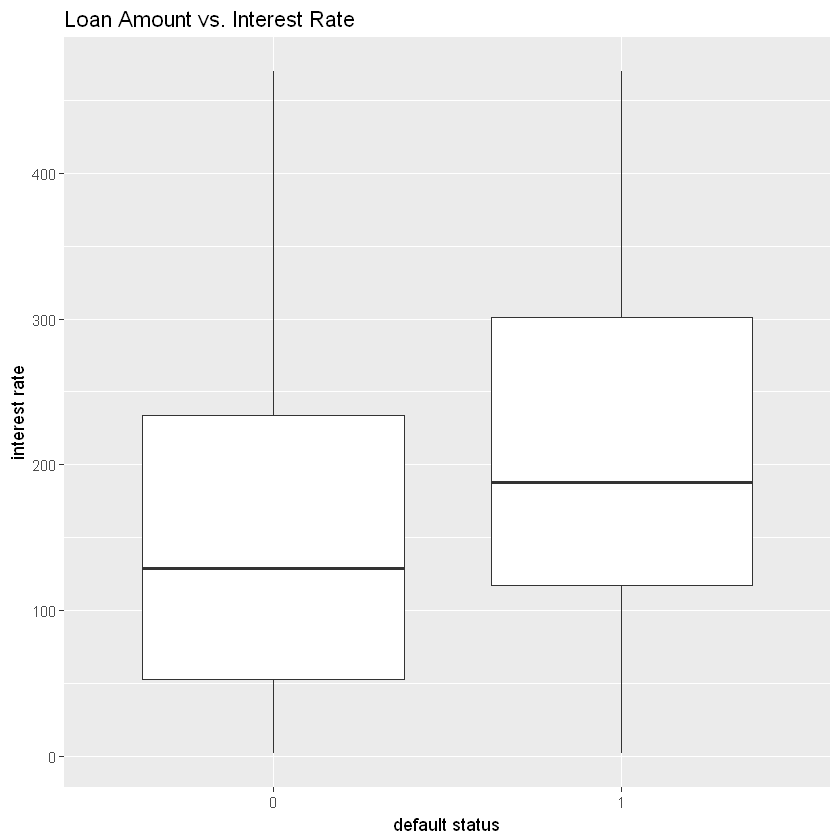

In [28]:
library(ggplot2)
ggplot(lending_club_final, aes(as.factor(default), as.double(int_rate))) + geom_boxplot() +
labs(title="Loan Amount vs. Interest Rate", x="default status", y="interest rate")

As can be seen from the boxplot above, default is more likely among higher interest rates. This is as expected.

##### emp_length


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  119273 

 
                  | default.factor 
emp_length.factor |         0 |         1 | Row Total | 
------------------|-----------|-----------|-----------|
         < 1 year |      9815 |      1669 |     11484 | 
                  |     0.855 |     0.145 |     0.096 | 
                  |     0.096 |     0.097 |           | 
                  |     0.082 |     0.014 |           | 
------------------|-----------|-----------|-----------|
           1 year |      7710 |      1267 |      8977 | 
                  |     0.859 |     0.141 |     0.075 | 
                  |     0.075 |     0.074 |           | 
                  |     0.065 |     0.011 |           | 
------------------|-----------|-----------|-----------|
        10+ years |     25854 |      4320 |     301

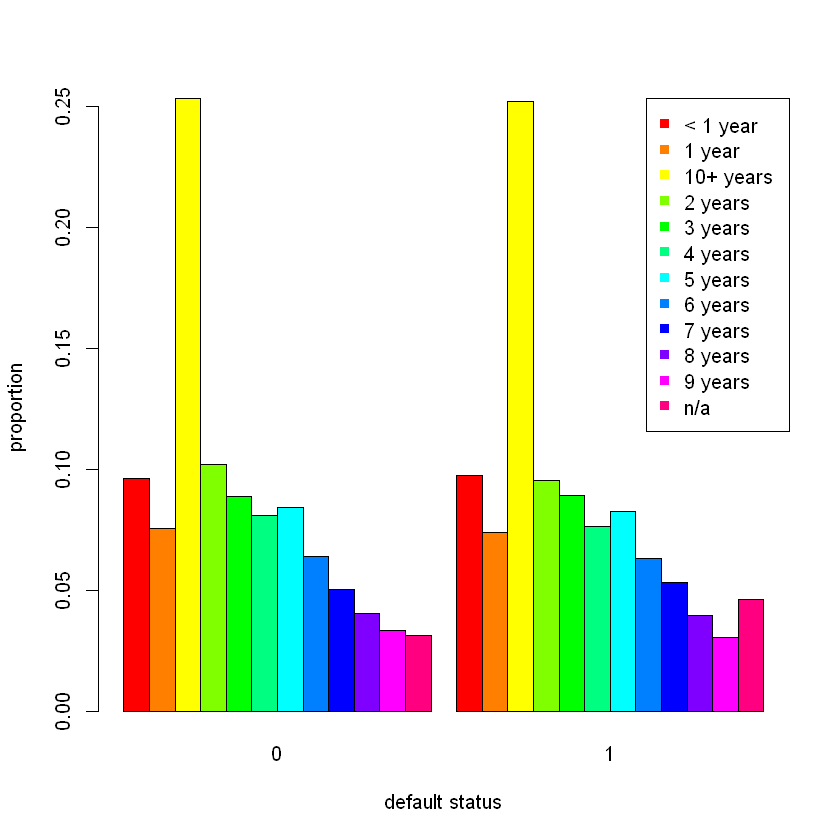

In [29]:
#install.packages("gmodels", repos='http://cran.us.r-project.org',dependencies = TRUE)
library(gmodels)

emp_length.factor <- lending_club_final$emp_length
default.factor <- as.factor(lending_club_final$default)

emp_length.levels <- levels(emp_length.factor)
emp_length.levels <- emp_length.levels[2:nlevels(lending_club_final$emp_length)]
emp_length.len <- length(emp_length.levels)

joint <- CrossTable(emp_length.factor, default.factor, prop.chisq=FALSE)
joint_counts <- joint$prop.col
barplot(joint_counts, beside=TRUE, ylab="proportion", xlab="default status", col=rainbow(emp_length.len))
legend("topright", emp_length.levels, pch=15, col=rainbow(emp_length.len))

As can be seen from the diagram above, the distribution of loans by employment length is essentially the same for those who defaulted and those who did not. Therefore, emp_lengh does not have much of a bearing in whether a borrower is likely or not to default.

##### Loan Amount (loan_amnt)

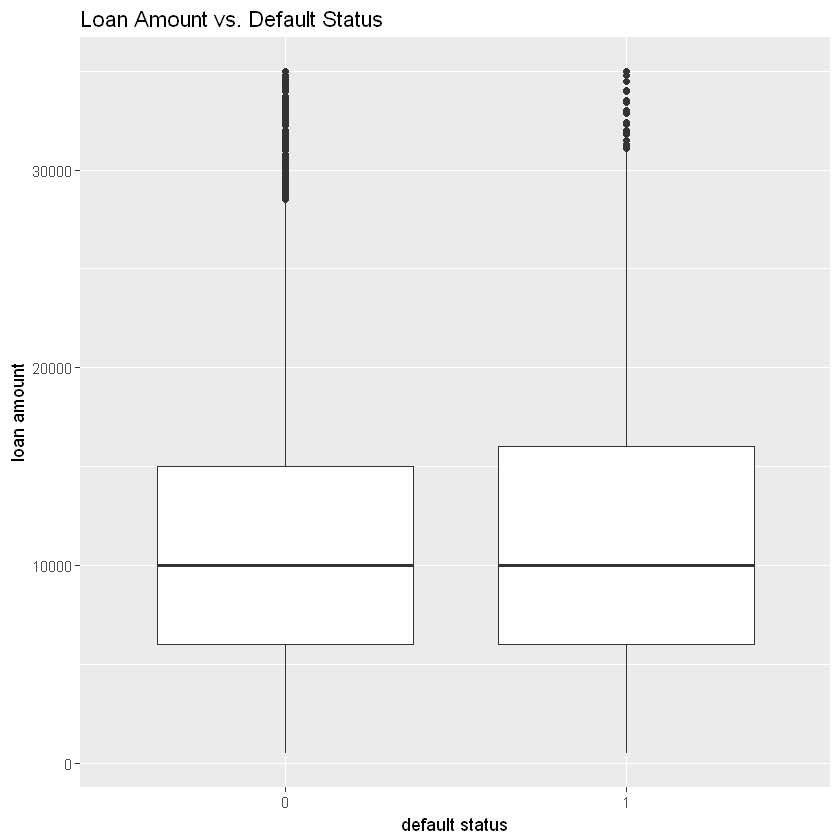

In [30]:
ggplot(lending_club_final, aes(as.factor(default), loan_amnt)) + geom_boxplot() +
labs(title="Loan Amount vs. Default Status", x="default status", y="loan amount")

As can be seen from the boxplot above, the loan amount has little bearing on whether or not a borrower is going to default.

##### Annual Income (annual_inc)

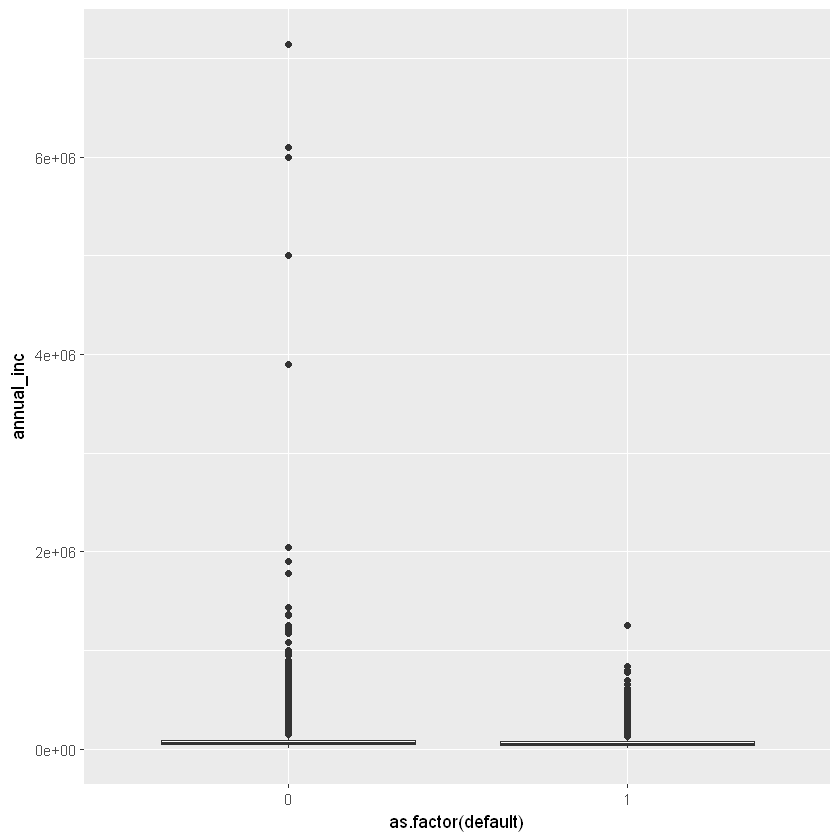

In [31]:
ggplot(lending_club_final, aes(as.factor(default), annual_inc)) + geom_boxplot()

The boxplot is not visible due to extreme outliers. I will redo boxplot without outliers. 

In [32]:
summary(lending_club_final$annual_inc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1896   41000   60000   68910   83000 7142000 

The outlier problem is further illustrated by the summary table above. The minimum annual income is \$1896 and the maximum is $7,142,000.  That's a range of over 7 million!

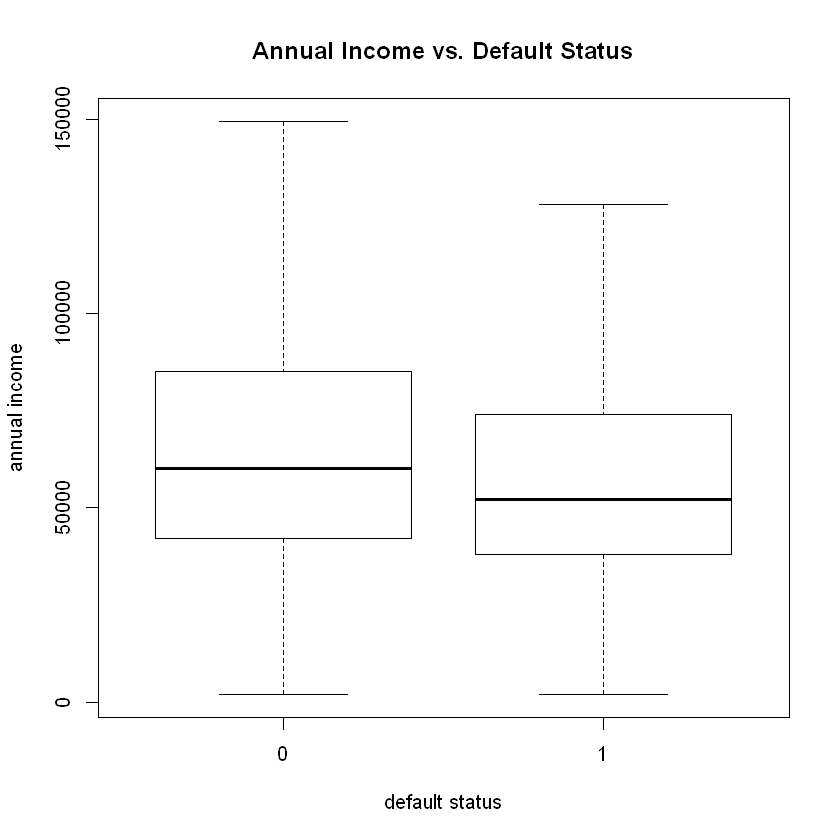

In [33]:
boxplot(annual_inc~as.factor(default),outline=FALSE, data=lending_club_final, ylab="annual income", xlab="default status")
title("Annual Income vs. Default Status")

From the boxplot above we can see that those who defaulted were more likely to have a lower income. This is as expected.

##### Number of delinquencies in the last 2 years (delinq_2yrs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1726  0.0000 18.0000 

                   default
delinq_2yrs                    0            1
  0                 8.803595e-01 8.683351e-01
  0.172637616987018 2.545750e-04 1.750088e-04
  1                 8.836690e-02 9.555478e-02
  2                 2.057162e-02 2.356785e-02
  3                 6.325210e-03 7.058686e-03
  4                 2.065974e-03 2.800140e-03
  5                 1.047674e-03 1.166725e-03
  6                 4.601933e-04 5.250263e-04
  7                 2.545750e-04 3.500175e-04
  8                 6.853942e-05 1.750088e-04
  9                 8.812212e-05 0.000000e+00
  10                3.916539e-05 5.833625e-05
  11                4.895673e-05 1.750088e-04
  12                1.958269e-05 0.000000e+00
  13                1.958269e-05 0.000000e+00
  14                0.000000e+00 5.833625e-05
  18                9.791346e-06 0.000000e+00

$`0`
   vars      n mean   sd median trimmed mad min max range skew kurtosis se
X1    1 102131 0.17 0.56      0    0.02   0   0  18    18 5.83    61.53  0

$`1`
   vars     n mean   sd median trimmed mad min max range skew kurtosis se
X1    1 17142 0.19 0.61      0    0.04   0   0  14    14 5.85    60.48  0

attr(,"call")
by.default(data = x, INDICES = group, FUN = describe, type = type)

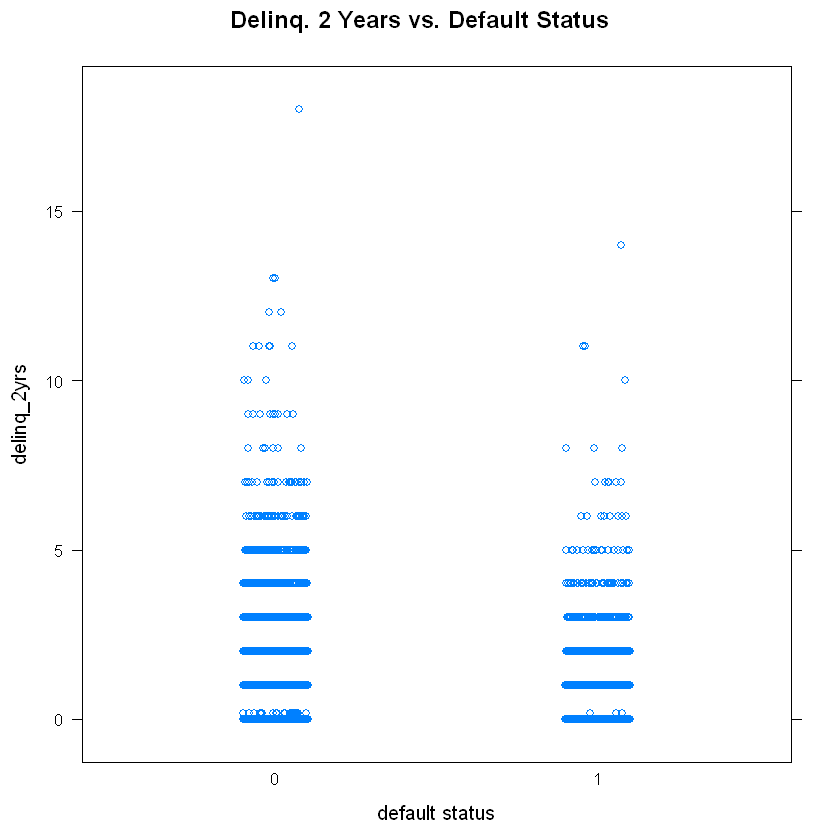

In [34]:
summary(lending_club_final$delinq_2yrs)
delinq_2.table <- table(delinq_2yrs=lending_club_final$delinq_2yrs,default=as.factor(lending_club_final$default))
prop.table(delinq_2.table,2)

#install.packages("psych", repos='http://cran.us.r-project.org',dependencies = TRUE)
#library(psych)
describeBy(lending_club_final$delinq_2yrs, as.factor(lending_club_final$default))

#library(lattice)
stripplot(lending_club_final$delinq_2yrs~as.factor(lending_club_final$default), jitter=TRUE, 
          main="Delinq. 2 Years vs. Default Status", xlab="default status", ylab="delinq_2yrs")

The distributions for the number of delinquencies in the last 2 years by default status are very similar. Number of delinquencies has little bearing on default status. 

##### fico_range_low

$`0`
   vars      n   mean    sd median trimmed   mad min max range skew kurtosis
X1    1 102131 708.85 35.12    700  705.68 37.06 610 845   235 0.74    -0.06
     se
X1 0.11

$`1`
   vars     n   mean    sd median trimmed   mad min max range skew kurtosis
X1    1 17142 696.79 30.01    690  693.48 29.65 615 825   210 0.96     0.64
     se
X1 0.23

attr(,"call")
by.default(data = x, INDICES = group, FUN = describe, type = type)

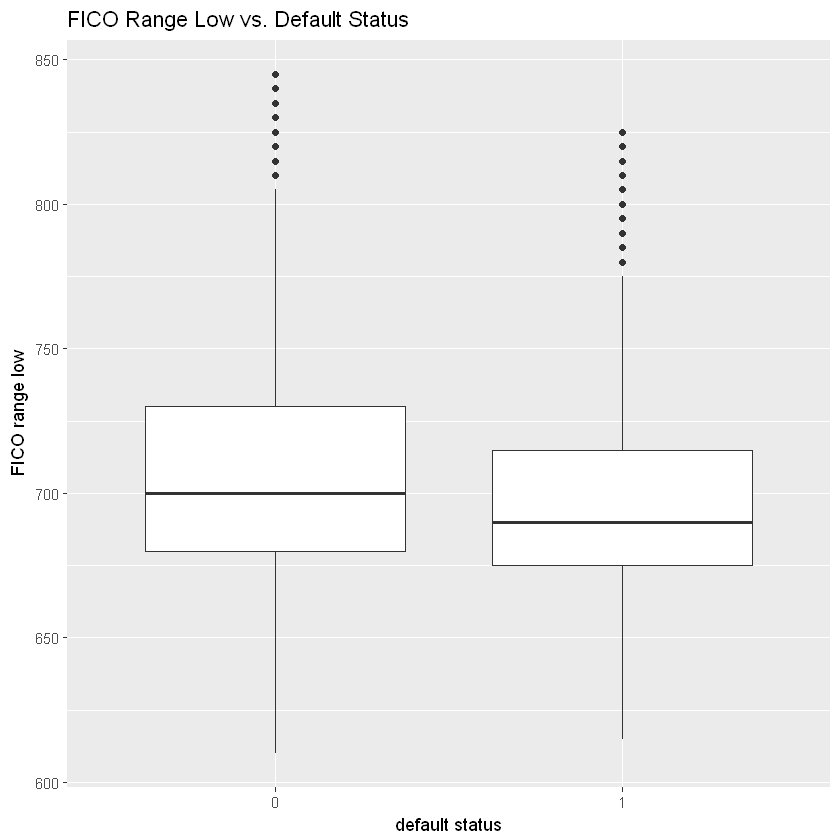

In [35]:
describeBy(lending_club_final$fico_range_low, as.factor(lending_club_final$default))
ggplot(lending_club_final, aes(as.factor(default), fico_range_low)) + geom_boxplot() +
    labs(title="FICO Range Low vs. Default Status", x="default status", y="FICO range low")

From the boxplots we can see that those who defaulted were more likely to have a lower fico_range_low. This is as expected.

##### fico_range_high

$`0`
   vars      n   mean    sd median trimmed   mad min max range skew kurtosis
X1    1 102131 712.85 35.12    704  709.68 37.06 614 850   236 0.74    -0.06
     se
X1 0.11

$`1`
   vars     n   mean    sd median trimmed   mad min max range skew kurtosis
X1    1 17142 700.79 30.01    694  697.48 29.65 619 829   210 0.96     0.64
     se
X1 0.23

attr(,"call")
by.default(data = x, INDICES = group, FUN = describe, type = type)

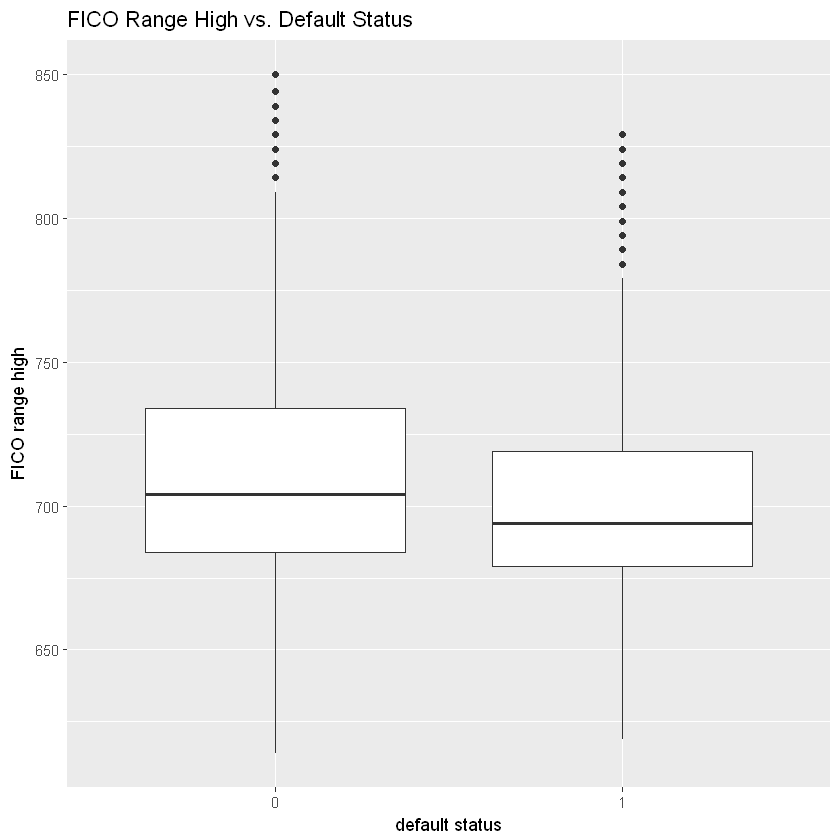

In [36]:
describeBy(lending_club_final$fico_range_high, as.factor(lending_club_final$default))
ggplot(lending_club_final, aes(as.factor(default), fico_range_high)) + geom_boxplot() +
    labs(title="FICO Range High vs. Default Status", x="default status", y="FICO range high")

From the boxplots we can see that those who defaulted were more likely to have a lower fico_range_high. This is as expected.

##### Debt-to-Income Ratio (dti)

$`0`
   vars      n  mean   sd median trimmed  mad min   max range skew kurtosis
X1    1 102131 14.82 7.31  14.65   14.69 8.02   0 34.99 34.99 0.16    -0.54
     se
X1 0.02

$`1`
   vars     n  mean   sd median trimmed  mad min   max range skew kurtosis   se
X1    1 17142 15.77 7.32  15.86   15.74 7.84   0 34.95 34.95 0.05    -0.51 0.06

attr(,"call")
by.default(data = x, INDICES = group, FUN = describe, type = type)

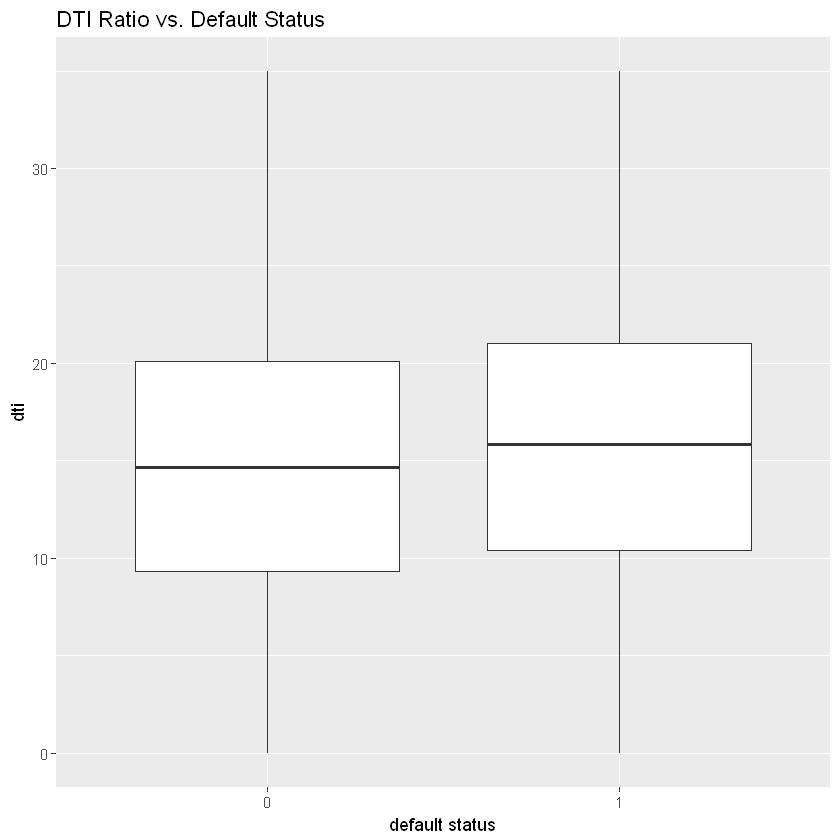

In [37]:
describeBy(lending_club_final$dti, as.factor(lending_club_final$default))

ggplot(lending_club_final, aes(as.factor(default), dti)) + geom_boxplot() +
    labs(title="DTI Ratio vs. Default Status", x="default status", y="dti")

The boxplots above demonstrate that those who defaulted were more likely have a higher DTI (Debt-to-Income) ratio. This is as expected.

##### last_fico_range_high

$`0`
   vars      n   mean    sd median trimmed  mad min max range  skew kurtosis
X1    1 102131 704.46 68.25    709   708.9 59.3   0 850   850 -1.36     8.83
     se
X1 0.21

$`1`
   vars     n   mean    sd median trimmed   mad min max range  skew kurtosis
X1    1 17142 590.82 58.71    594  590.24 66.72   0 850   850 -0.04     0.53
     se
X1 0.45

attr(,"call")
by.default(data = x, INDICES = group, FUN = describe, type = type)

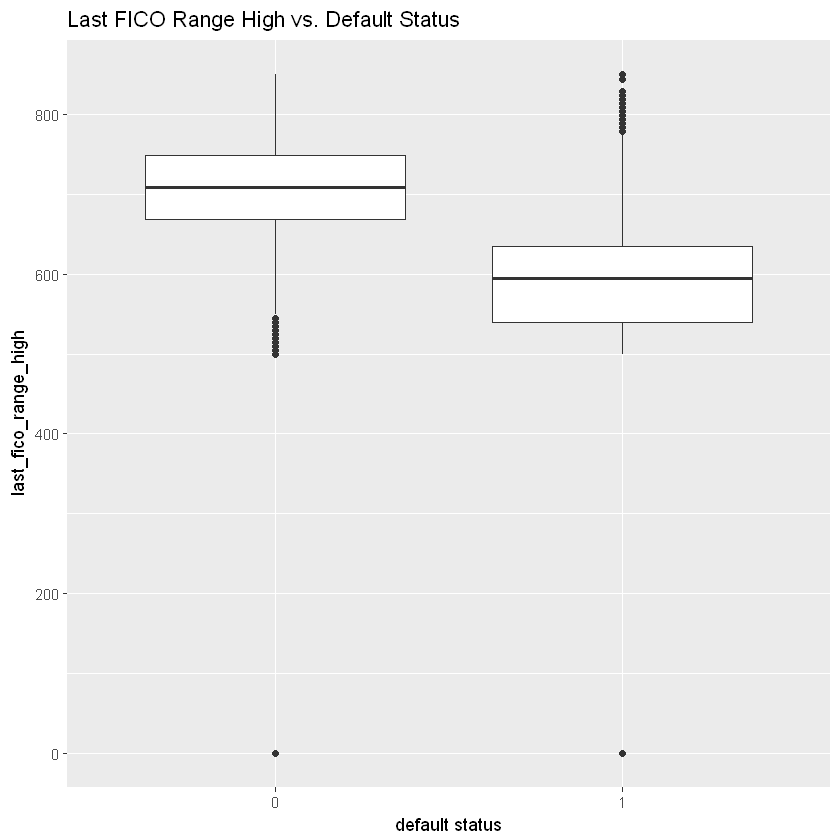

In [38]:
describeBy(lending_club_final$last_fico_range_high, as.factor(lending_club_final$default))

ggplot(lending_club_final, aes(as.factor(default), last_fico_range_high)) + geom_boxplot() +
    labs(title="Last FICO Range High vs. Default Status", x="default status", y="last_fico_range_high")

As expected borrowers who default are more likely to have a lower low range FICO score. The interesting thing about this feature is that it seems to have a much larger impact on default status than the other low range FICO score (fico_range_low) and all other features examined so far. I imagine this is becuase last_fico_range_low is a more recent FICO score and better reflects the borrowers current financial situation.

##### last_fico_range_low

$`0`
   vars      n   mean    sd median trimmed  mad min max range skew kurtosis
X1    1 102131 698.19 81.92    705   704.9 59.3   0 845   845 -3.5    26.62
     se
X1 0.26

$`1`
   vars     n   mean     sd median trimmed   mad min max range  skew kurtosis
X1    1 17142 543.68 175.68    590  586.24 66.72   0 845   845 -2.49     5.08
     se
X1 1.34

attr(,"call")
by.default(data = x, INDICES = group, FUN = describe, type = type)

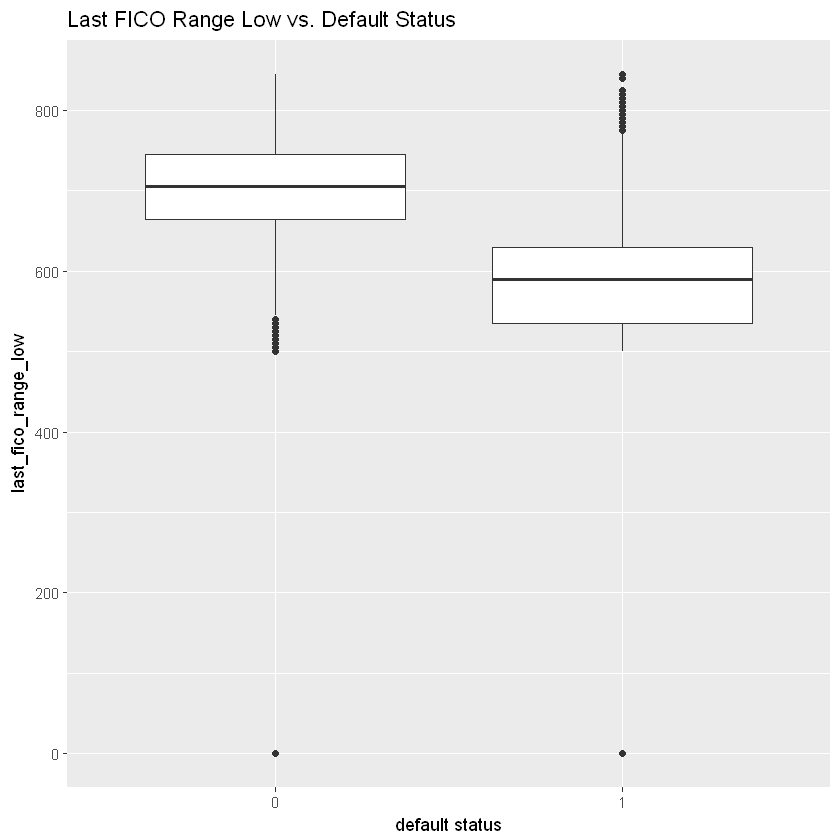

In [39]:
describeBy(lending_club_final$last_fico_range_low, as.factor(lending_club_final$default))

ggplot(lending_club_final, aes(as.factor(default), last_fico_range_low)) + geom_boxplot() +
    labs(title="Last FICO Range Low vs. Default Status", x="default status", y="last_fico_range_low")

As expected having a lower, high range recent FICO score is more likely among borrowers who default. Again similar to last_fico_range_high, last_fico_range_low has a significant impact on whether the borrower is likel to default for similar reasons.

#### Cleaning data - Little touch-ups

In [40]:
# convert issue_d to POSIX because as factors they have too many levels!
lending_club_final$issue_d <- as.vector(sapply(lending_club_final$issue_d, function(x) paste0(x,"-01")))
lending_club_final$issue_d <- as.Date(lending_club_final$issue_d,"%b-%Y-%d")
lending_club_final$issue_d <- as.numeric(as.POSIXct(lending_club_final$issue_d, format="%Y-b%-%d"))

# convert int_rate to numeric
lending_club_final$int_rate <- as.character(lending_club_final$int_rate)
lending_club_final$int_rate <- as.numeric(substr(lending_club_final$int_rate,1,nchar(lending_club_final$int_rate)-1))
 
# convert earliest_cr_line to POSIX
lending_club_final$earliest_cr_line <- as.vector(sapply(lending_club_final$earliest_cr_line, function(x) paste0(x,"-01")))
lending_club_final$earliest_cr_line <- as.Date(lending_club_final$earliest_cr_line,"%b-%Y-%d")
lending_club_final$earliest_cr_line <- as.numeric(as.POSIXct(lending_club_final$earliest_cr_line, format="%Y-b%-%d"))    

# convert revol_util to numeric
lending_club_final$revol_util <- as.character(lending_club_final$revol_util)
lending_club_final$revol_util <- as.numeric(substr(lending_club_final$revol_util,1,nchar(lending_club_final$revol_util)-1))

# convert last_credit_pull_d to POSIX because as factors they have too many levels!
lending_club_final$last_credit_pull_d <- as.vector(sapply(lending_club_final$last_credit_pull_d, function(x) paste0(x,"-01")))
lending_club_final$last_credit_pull_d <- as.Date(lending_club_final$last_credit_pull_d,"%b-%Y-%d")
lending_club_final$last_credit_pull_d <- as.numeric(as.POSIXct(lending_club_final$last_credit_pull_d, format="%Y-b%-%d"))
        
# remove useless variables
to_remove <- c("url","desc","title","emp_title","id","loan_status","zip_code")
lending_club_final <- lending_club_final[ , !(names(lending_club_final) %in% to_remove)]

#### Remove incomplete records
Incomplete records should be removed as long as they are a small portion of the data set < 3%

In [41]:
nrows <- nrow(lending_club_final)
ncomplete <- sum(complete.cases(lending_club_final))
print(1-(ncomplete/nrows))

[1] 0.001224083


Since incomplete rows represent < 3% of data set, remove them. 

#### Number of records after incomplete records removed

In [42]:
lending_club_final <- lending_club_final[complete.cases(lending_club_final),]

# how many records in data set so far
lcf_before_na_rm <- nrow(lending_club_final)
lcf_before_na_rm

[1] 119127

#### Correlation Analysis
In this section I will find pair-wise correlations. Highly correlated features are redundant an can possibly diminish the performance of a prediction model.

Warning message:
"package 'corrplot' was built under R version 3.3.2"

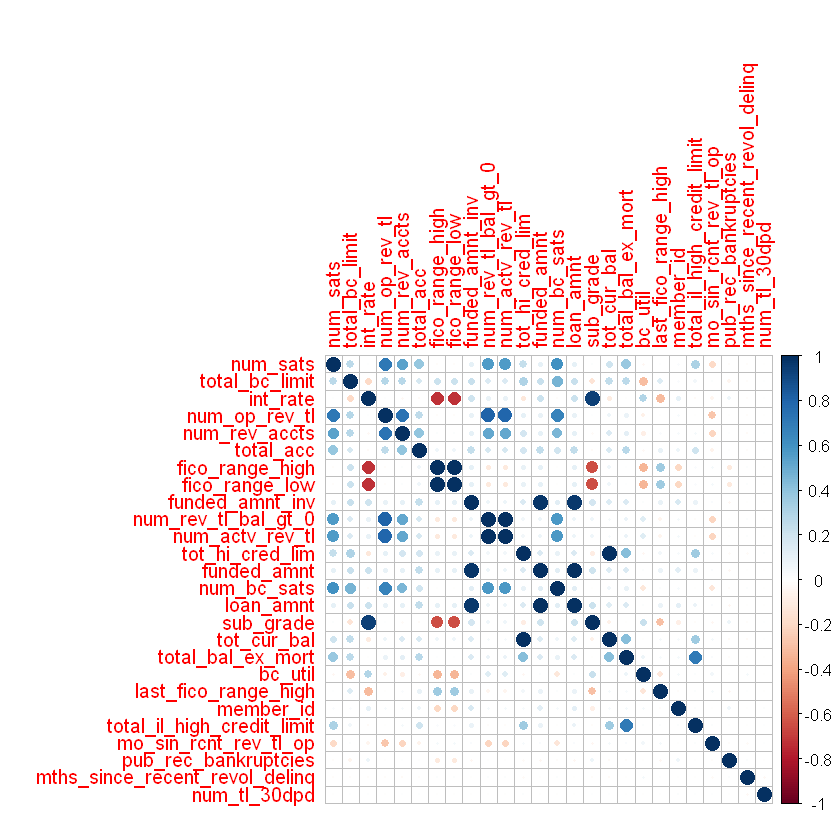

In [43]:
lending_club_final_fact_as_num <- lending_club_final

# change factor columns/ features to numeric
indx <- sapply(lending_club_final_fact_as_num, is.factor)
lending_club_final_fact_as_num[indx] <- lapply(lending_club_final_fact_as_num[indx], function(x) seq_along(levels(x))[x])

# create subset of dataset with only numeric features    
num_feat <- sapply(lending_club_final_fact_as_num, is.numeric)
lending_club_final_num_only <- lending_club_final_fact_as_num[,num_feat] 

# eliminate columns/features which are all the same value
unilength <- sapply(lending_club_final_num_only,function(x) length(unique(x)))
lending_club_final_num_only <- subset(lending_club_final_num_only, select=unilength>1)
    
# calculate correlation matrix
correlationMatrix <- cor(lending_club_final_num_only)

# summarize the correlation matrix
#print(correlationMatrix)

# find features that are highly correlated
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.6)
highCorrelationMatrix <- correlationMatrix[highlyCorrelated,highlyCorrelated]

# plot correlation of highly correlated features
library(corrplot)
corrplot(highCorrelationMatrix, method="circle")

#### Dataset Balance
In this section I am going to check if the dataset is balanced. In other words, is the proportion of loans which defaulted similar to those who did not? People normally pay off their loans so the data should be unbalanced.

How many records per class?

In [44]:
table(lending_club_final$default)


     0      1 
102021  17106 

What is the proportion per class?

In [45]:
prop.table(table(lending_club_final$default))


        0         1 
0.8564053 0.1435947 

As we can see the dataset is unbalanced and will have to be balanced before creating our predictive models.

## Approach

<img src="images\approach.png" style="width: 800px;"/>

#### Step 1: Load, Cleanse and Balance
Load dataset and perform initial cleansing.  Cleansing will entail removing features which only contain NA values, imputing values into features which have a large proportion of NA values, changing feature data types in order to perform correlation analysis. Imputing will be done by populating NA's with the column average. Finally, the dataset will tested for imbalance and corrected if necessary.

#### Step 2: Feature Selection
Determine which features are significant and which will be used in the predictive models. Some feature analysis will be performed in order to understand the data but Recursive Feature Elimination (RFE) will be relied upon to determine the optimal feature subset.

#### Step 3: Create and Train Model
Using the pruned dataset consisting of features determined from steps 1 and 2, create a test and training dataset.  Create predictive models on the training dataset for the following algorithms: Random Forests, Bagged Decision Trees, and Support Vector Machines (SVM). Note: Each model is created using the same training dataset.

#### Step 4: Make Predictions
Use the models on the test dataset and record the results.

#### Step 5: Measure Performance
This is a sub-step of step 5.  For each result set in step 5, measure the Percentage Correctly Classified (PCC), the area under a ROC curve (AUC), and accuracy, then compare the performance of each of the classification algorithms.

#### Step 6: Causes of Default
Using the knowledge gained from all of the previous steps, determine the causes of loan default.

## Predictive Models

#### Create training and test data sets

In [46]:
train_rows <- sample(nrow(lending_club_final),(nrow(lending_club_final)*0.6))
lending_club.train <- lending_club_final[train_rows,]
lending_club.test <- lending_club_final[-train_rows,]

#### Before balancing the dataset


    0     1 
61128 10348 


        0         1 
0.8552241 0.1447759 

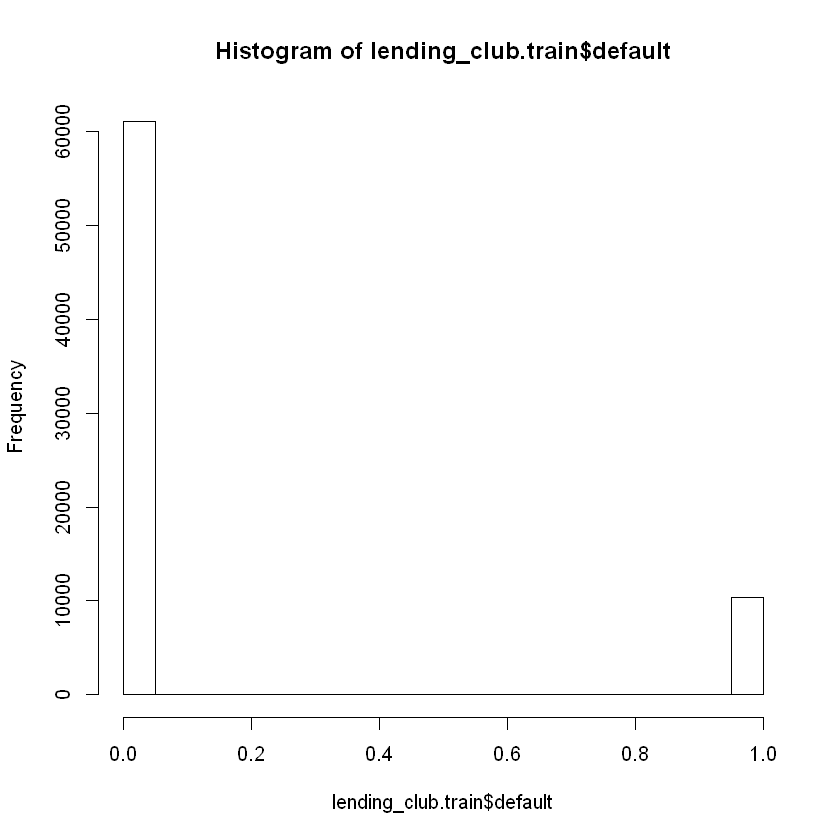

In [47]:
# How many records per class?
table(lending_club.train$default)

# Plot histogram of class distribution
hist(lending_club.train$default)

# Percentage of total dataset per class (0= non-default, 1= default)
prop.table(table(lending_club.train$default))

hist(lending_club.train$default)

#### Balancing the Training Dataset - Using SMOTE

In [48]:
#install.packages("unbalanced", repos='http://cran.us.r-project.org',dependencies = TRUE)
#library(unbalanced)

n <- ncol(lending_club.train)
y <- as.factor(lending_club.train$default)
x <- lending_club.train[ ,-n]
lending_club.train.smote <- ubSMOTE(X=x, Y=y)
lending_club.train.smote$default <- as.numeric(as.character(lending_club.train.smote$Y))

In [49]:
lending_club.train <- cbind(lending_club.train.smote$X, default=lending_club.train.smote$default)

##### After balancing the dataset


    0     1 
41392 31044 


        0         1 
0.5714286 0.4285714 

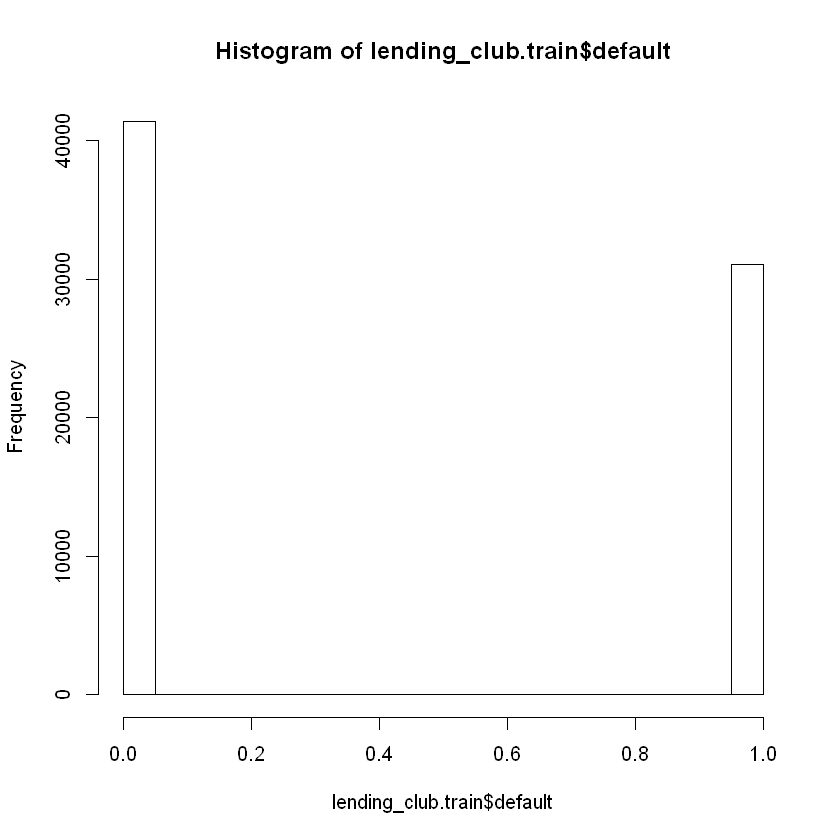

In [50]:
# How many records per class?
table(lending_club.train$default)

# Plot histogram of class distribution
hist(lending_club.train$default)

# Percentage of total dataset per class (0= non-default, 1= default)
prop.table(table(lending_club.train$default))

hist(lending_club.train$default)

### Random Forest
#### Train model and make predictions - Pre-RFE
I am training the random forest algorithm against all of the variables/features. This model will be a baseline to compare to others.

In [51]:
library(caret)
#install.packages("e1071", repos='http://cran.us.r-project.org',dependencies = TRUE)
library(e1071)
library(randomForest)
set.seed(9)

ptm <- proc.time()
#########################
rf.fit <- randomForest(as.factor(default)~., data=lending_club.train, importance=TRUE, ntree=400)

# Generate predictions based on model
lending_club.test$default.pred <- predict(rf.fit,lending_club.test)
########################
rf.pre.time <- proc.time() - ptm

Warning message:
"package 'e1071' was built under R version 3.3.2"
Attaching package: 'e1071'

The following object is masked from 'package:mlr':

    impute

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:psych':

    outlier

The following object is masked from 'package:ggplot2':

    margin



#### Measure performance - Random Forest Pre-RFE

In [52]:
# Create Confusion Matrix
cm.pre_rfe <- confusionMatrix(lending_club.test$default.pred,lending_club.test$default)
cm.pre_rfe

# area under a ROC curve
#auc(lending_club.test$default,as.numeric(lending_club.test$default.pred))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 39634  2548
         1  1259  4210
                                          
               Accuracy : 0.9201          
                 95% CI : (0.9176, 0.9225)
    No Information Rate : 0.8582          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6434          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9692          
            Specificity : 0.6230          
         Pos Pred Value : 0.9396          
         Neg Pred Value : 0.7698          
             Prevalence : 0.8582          
         Detection Rate : 0.8318          
   Detection Prevalence : 0.8852          
      Balanced Accuracy : 0.7961          
                                          
       'Positive' Class : 0               
                                          

Area under the curve: 0.7961

#### Recursive Feature Elimination (RFE)
So far we have not considered significance when cleansing the data set.  RFE analysis will identify a data set subset for optimal results.

In [53]:
# Let's use RFE to see if we can prune some variables/features and hopefully get a better result
set.seed(77)

# 10-fold cross-validation
control <- rfeControl(functions=rfFuncs, method="cv", number=10)
lending_club.train.rfe <- lending_club.train[sample(nrow(lending_club.train),2000),]
rfe.train <- rfe(lending_club.train.rfe[,1:79], as.factor(lending_club.train.rfe[,80]), sizes=1:79, rfeControl=control)

# how big is the optimal variable subset?
print(rfe.train$bestSubset)


Attaching package: 'plyr'

The following object is masked from 'package:modeltools':

    empty



[1] 24


#### Plot the number of variables vs. RMSE

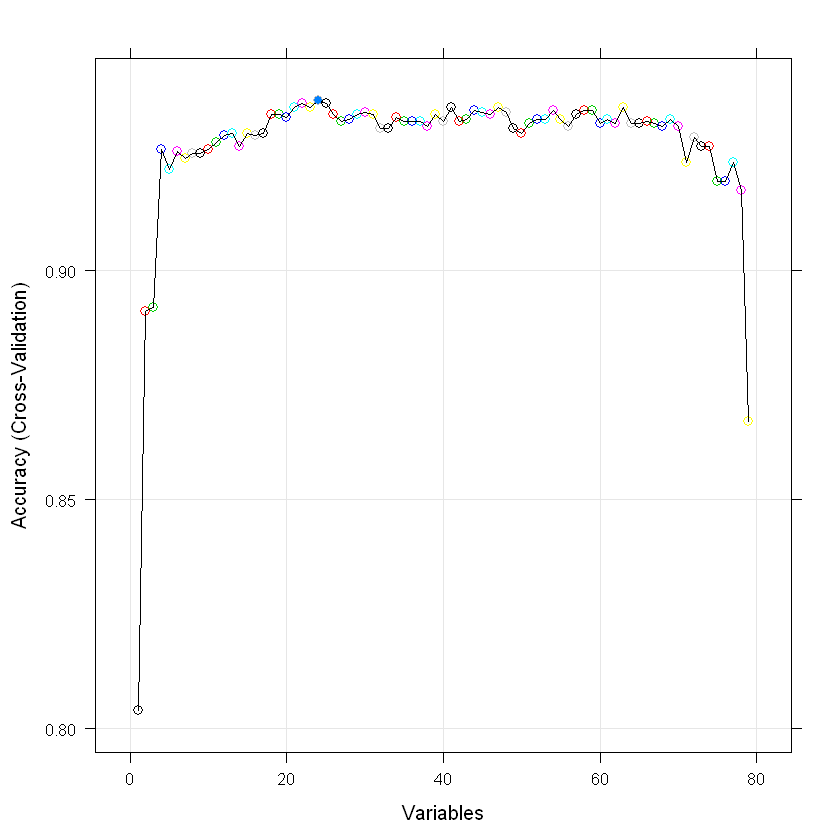

In [54]:
plot(rfe.train, type=c("g", "o"), cex = 1.0, col = 1:79)

#### What specific variables/features comprise the optimal subset?

In [55]:
predictors(rfe.train)

[1] "last_credit_pull_d"         "last_fico_range_low"       
 [3] "last_fico_range_high"       "collections_12_mths_ex_med"
 [5] "chargeoff_within_12_mths"   "mths_since_last_record"    
 [7] "pub_rec_bankruptcies"       "dti"                       
 [9] "funded_amnt"                "loan_amnt"                 
[11] "inq_last_6mths"             "int_rate"                  
[13] "issue_d"                    "installment"               
[15] "member_id"                  "funded_amnt_inv"           
[17] "annual_inc"                 "fico_range_high"           
[19] "num_tl_120dpd_2m"           "tot_coll_amt"              
[21] "mths_since_last_delinq"     "grade"                     
[23] "fico_range_low"             "num_tl_30dpd"

In [56]:
predictors <- predictors(rfe.train)
formula <- paste("as.factor(default)",paste(predictors, collapse=" + "), sep="~")
formula <- as.formula(formula)
formula

as.factor(default) ~ last_credit_pull_d + last_fico_range_low + 
    last_fico_range_high + collections_12_mths_ex_med + chargeoff_within_12_mths + 
    mths_since_last_record + pub_rec_bankruptcies + dti + funded_amnt + 
    loan_amnt + inq_last_6mths + int_rate + issue_d + installment + 
    member_id + funded_amnt_inv + annual_inc + fico_range_high + 
    num_tl_120dpd_2m + tot_coll_amt + mths_since_last_delinq + 
    grade + fico_range_low + num_tl_30dpd

#### Train Random Forest model Post-RFE and generate predictions

In [137]:
# Redo the Random Forest model with the optimal subset according to RFE
set.seed(44)

ptm <- proc.time()
#########################
rf.fit.opt <- randomForest(formula, data=lending_club.train, ntree=400, type='classification')

lending_club.test$default.pred.opt <- predict(rf.fit.opt,lending_club.test)
########################
rf.post.time <- proc.time() - ptm

#### Measure performance - Random Forest Post-RFE

In [138]:
# Create Confusion Matrix
cm.post_rfe <- confusionMatrix(lending_club.test$default.pred.opt,lending_club.test$default)
cm.post_rfe

# store Accuracy (PCC)
#pcc_acc.post_rfe <- x$overall[1]

# find area under a ROC curve
#auc.post.rfe <- auc(lending_club.test$default,as.numeric(lending_club.test$default.pred.opt))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 38173   667
         1  2720  6091
                                          
               Accuracy : 0.9289          
                 95% CI : (0.9266, 0.9312)
    No Information Rate : 0.8582          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7409          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9335          
            Specificity : 0.9013          
         Pos Pred Value : 0.9828          
         Neg Pred Value : 0.6913          
             Prevalence : 0.8582          
         Detection Rate : 0.8011          
   Detection Prevalence : 0.8151          
      Balanced Accuracy : 0.9174          
                                          
       'Positive' Class : 0               
                                          

### Bagged Decision Trees 
#### Create model and make predictions

In [139]:
set.seed(3)
# BAGGED DECISION TREES
library(rpart)
#install.packages("adabag", repos='http://cran.us.r-project.org',dependencies = TRUE)
library(adabag)
lending_club.train$default.factor <- as.factor(lending_club.train$default)
lending_club.test$default.factor <- as.factor(lending_club.test$default)
formula_bdt <- paste("default.factor",paste(predictors,collapse=" + "),sep="~")

ptm <- proc.time()
#########################
# mfinal indicates total number of trees grown 
# and minsplit is the minimum number of observations that must exist in a node in order for a split to be attempted
bdt.bagging <- bagging(formula_bdt, mfinal=500, control=rpart.control(minsplit = 50), data=lending_club.train)

# make predictions
bdt.bagging.pred <- predict.bagging(bdt.bagging, newdata=lending_club.test)
########################
bdt.time <- proc.time() - ptm

#### Bagged Decision Trees - Measure Performance

In [140]:
# Create Confusion Matrix
cm.bdt <- confusionMatrix(bdt.bagging.pred$class,lending_club.test$default)
cm.bdt

# find Area Under a ROC Curve (AUC)
#auc(lending_club.test$default,as.numeric(bdt.bagging.pred$class))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 37255   809
         1  3638  5949
                                         
               Accuracy : 0.9067         
                 95% CI : (0.904, 0.9093)
    No Information Rate : 0.8582         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6736         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9110         
            Specificity : 0.8803         
         Pos Pred Value : 0.9787         
         Neg Pred Value : 0.6205         
             Prevalence : 0.8582         
         Detection Rate : 0.7818         
   Detection Prevalence : 0.7988         
      Balanced Accuracy : 0.8957         
                                         
       'Positive' Class : 0              
                                         

### Support Vector Machines

In [141]:
set.seed(10)

ptm <- proc.time()
#########################
# create SVM model
lc.svm.fit <- svm(formula, data=lending_club.train)

# make predictons
lending_club.test$default.pred.svm <- predict(lc.svm.fit,lending_club.test)
########################
svm.time <- proc.time() - ptm

# Create Confusion Matrix
cm.svm <- confusionMatrix(lending_club.test$default.pred.svm,lending_club.test$default)
cm.svm

# find Area Under a ROC Curve (AUC)
#auc(lending_club.test$default,as.numeric(lending_club.test$default.pred.svm))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 37496  1123
         1  3397  5635
                                          
               Accuracy : 0.9051          
                 95% CI : (0.9025, 0.9078)
    No Information Rate : 0.8582          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6583          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9169          
            Specificity : 0.8338          
         Pos Pred Value : 0.9709          
         Neg Pred Value : 0.6239          
             Prevalence : 0.8582          
         Detection Rate : 0.7869          
   Detection Prevalence : 0.8105          
      Balanced Accuracy : 0.8754          
                                          
       'Positive' Class : 0               
                                          

#### Visualize the Prediction Model Using Conditional Inference Trees (CTree)

In [142]:
lending_club.init_sol <- lending_club_final

# train and test datasets
train_rows <- sample(nrow(lending_club.init_sol),(nrow(lending_club.init_sol)*0.7))
lending_club.init_sol.train <- lending_club.init_sol[train_rows,]
lending_club.init_sol.test <- lending_club.init_sol[-train_rows,]

lending_club.init_sol.train$default <- factor(lending_club.init_sol.train$default, levels=c(0,1), labels=c('PAID', 'DEFAULT'))
lending_club.init_sol.test$default <- factor(lending_club.init_sol.test$default, levels=c(0,1), labels=c('PAID', 'DEFAULT'))

In [143]:
# create model
default_pred.ctree <- ctree(formula, data=lending_club.init_sol.train, 
                               controls=ctree_control(testtype="Bonferroni", minsplit=4000, minbucket=4000))

# save model of tree to disk
png("ctree.png", res=80, height=900, width=2000) 
   plot(default_pred.ctree) 
dev.off()

png 
  2

#### Measure Accuracy - CTree

In [144]:
lending_club.init_sol.test$default.pred <- predict(default_pred.ctree, newdata=lending_club.init_sol.test, type='response')
cm.ctree <- confusionMatrix(lending_club.init_sol.test$default.pred, lending_club.init_sol.test$default, positive="PAID")

#### Compile Prediction Performance Results

In [207]:
# poplulate Accuracy (PCC)
acc <- cbind(as.numeric(cm.post_rfe$overall)[1],as.numeric(cm.bdt$overall)[1],as.numeric(cm.svm$overall)[1])

# populate Kappa
kap <- cbind(as.numeric(cm.post_rfe$overall)[2],as.numeric(cm.bdt$overall)[2],as.numeric(cm.svm$overall)[2])

# populate Sensitivity
sen <- cbind(as.numeric(cm.post_rfe$byClass)[1],as.numeric(cm.bdt$byClass)[1],as.numeric(cm.svm$byClass)[1])

# populate Specificity
spec <- cbind(as.numeric(cm.post_rfe$byClass)[2],as.numeric(cm.bdt$byClass)[2],as.numeric(cm.svm$byClass)[2])

# populate AUC
auc <- cbind(as.numeric(cm.post_rfe$byClass)[11],as.numeric(cm.bdt$byClass)[11],as.numeric(cm.svm$byClass)[11])

perf.mat <- rbind(acc,kap,sen,spec,auc)
rownames(perf.mat) <- c("PCC (1)","Kappa (2)","Sensitivity (3)","Specificity (4)","AUC (5)")
colnames(perf.mat) <- c("Random Forest - Post RFE","Bagged Decision Trees","SVM")
#perf.mat
#matplot(perf.mat, type = c("b"),pch=1,col = 2:4)
#legend("bottomright", legend = c("Random Forest - Post RFE","Bagged Decision Trees","SVM"), col=2:4, pch=1) 

#res.vec <- as.vector(cbind(acc,kap,sen,spec,auc))
#rec.struc <- structure(res.vec, .Dim=c(5L,3L), .Dimnames=list(c("PCC","Kappa","Sensitivity","Specificity","AUC"),
#                                                              c("Random Forest - Post RFE","Bagged Decision Trees","SVM")))
#rownames(rec.struc)
#matplot(rownames(rec.struc), rec.struc, type='l')

#### Compile Time Performance Results

In [146]:
rf.mat <- as.matrix(rf.post.time)
svm.mat <- as.matrix(svm.time)
bdt.mat <- as.matrix(bdt.time)

et <- cbind(rf.mat[3], svm.mat[3], bdt.mat[3])
colnames(et) <- c("Random Forests","SVM","Bagged DT")
#et
#barplot(et, main="Classification Model Time Performance", ylab="elapsed time in seconds")

## Results

### Predictive Models Performance

This section will summarize the results of the prediction performance measures for all of the classification algorithms covered in this project. The measures of performance to be compared are Accuracy (Percent Correctly Classified), Area Under a ROC Curve (AUC), as well as Sensitivity and Specificity.

,Random Forest - Post RFE,Bagged Decision Trees,SVM
PCC (1),0.9289207,0.9066756,0.9051436
Kappa (2),0.7408529,0.6736312,0.6583035
Sensitivity (3),0.9334849,0.9110361,0.9169295
Specificity (4),0.9013022,0.8802900,0.8338266
AUC (5),0.9173936,0.8956631,0.8753781


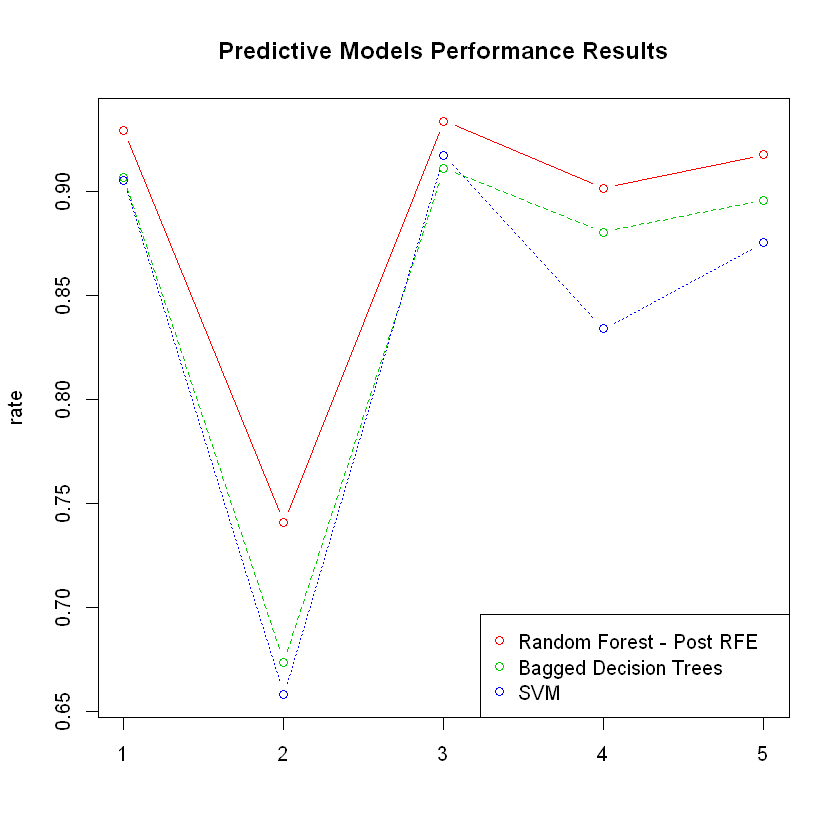

In [211]:
matplot(perf.mat, type = c("b"),pch=1,col = 2:4, ylab="rate", main="Predictive Models Performance Results")
legend("bottomright", legend = c("Random Forest - Post RFE","Bagged Decision Trees","SVM"), col=2:4, pch=1) 
perf.mat

#### Predictive Models Results Summary
Over all of the metrics used, the best performer is Random Forests. The first metric is Percentage Correctly Classified (PCC), which measures the classified loans as a percentage of all loans. The second is Kappa, which is a measure of agreement between two raters. This measure is considered more robust than the others used here. The third is Sensitivity which is the proportion of borrowers who were predicted as not defaulting versus all the borrowers who actually did not default. In other words it measures the success rate of predicting who will not default. The fourth is Specificity which is the proportion of borrowers who were predicted as defaulting versus all the borrowers who did default. This metric is especially important since it captures the success rate of predicting who will default. The final metric is Area Under a ROC Curve which measures the relationship between the true positive rate (TPR) and the false positive rate (FPR). An AUC of 1 means that all borrowers predicted not default did not default in reality. An AUC of 0.5 would indicate that of the borrowers predicted not to default, half actually did while the other half did not.

### Time Performance
This section will summarize the time performance for each predictive model.

Random Forests,SVM,Bagged DT
124.52,645.62,2100.86


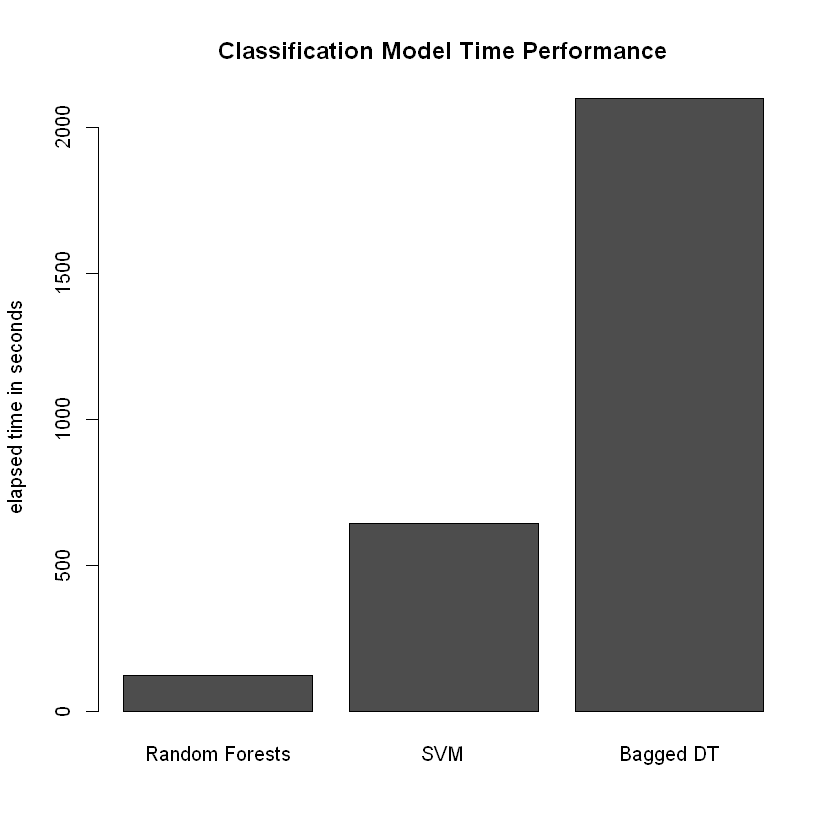

In [248]:
et
barplot(et, main="Classification Model Time Performance", ylab="elapsed time in seconds")

#### Time Performance Summary
The time performance results show that Random Forests outperform Support Vector Machines and Bagged Decision Trees.

### Important Features for Prediction
In this section the features in the dataset which are the most important for predicting loan default. These features should be collected for each potential borrower to determine his/her likelihood of default.

In [216]:
dataDict <- read.table("LCDataDictionary.csv", header = TRUE, sep=",")
dataDict[which(dataDict$Feature %in% predictors(rfe.train)),]

,Feature,Description
5,annual_inc,The self-reported annual income provided by the borrower during registration.
11,chargeoff_within_12_mths,Number of charge-offs within 12 months
13,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
17,fico_range_high,The upper boundary range the borrower?s FICO at loan origination belongs to.
18,fico_range_low,The lower boundary range the borrower?s FICO at loan origination belongs to.
19,funded_amnt,The total amount committed to that loan at that point in time.
20,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
21,grade,LC assigned loan grade
28,inq_last_6mths,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
29,installment,The monthly payment owed by the borrower if the loan originates.


### Loan Approval Decision Process

<img src="images\ctree.png" style="width: 1000px;"/>

This decision tree above can be used to predict whether a potential borrower will or will not default on their loan. By starting at the top node of the tree and by following the decisions you eventually arrive at a probability of default or non-default (paid). By studying this tree we can glean some important insights:

The last credit pull date (last_credit_pull_d) is an indicitive feature when sizing up a potential borrower. If a potential borrower has had a credit pull within 4 years and 7 months ago or earlier this is of significant concern. 

Overall the most indicitive feature for default is the high range of the last FICO score (last_fico_range_high). If last_fico_range_high is greater than 649 the probability of default is minimal. The only exception to that would be when the borrower has had a credit pull within the last 4 years and 7 months. Meanwhile, if last_fico_range_high is less than 649 and the last credit pull date is 4 years and 7 months ago or earlier, then the probability of default is about 60% or higher.

The most dangerous potential borrower is someone with a last_fico_range_high of less than 545. Potential borrowers with such a low FICO score are at least 70% likely to default.

NOTES:
**This tree is based on the Conditional Inference Trees model generated above (see heading "Visualize the Prediction Model Using Conditional Inference Trees (CTree)"). It's performance measures are displayed below.**

This tree has been compressed and does not show all of the possible decision points. This has been done for display purposes.  A larger more detailed tree can be generated for a more in-depth analysis.

*Please note that 147000960 translates to Jan. 27, 2012 and since the data is current to Sept. 1, 2016, it roughly translates to 4 years and 7 months ago.

In [222]:
cm.ctree

Confusion Matrix and Statistics

          Reference
Prediction  PAID DEFAULT
   PAID    28636     936
   DEFAULT  2039    4128
                                          
               Accuracy : 0.9168          
                 95% CI : (0.9138, 0.9196)
    No Information Rate : 0.8583          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6863          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9335          
            Specificity : 0.8152          
         Pos Pred Value : 0.9683          
         Neg Pred Value : 0.6694          
             Prevalence : 0.8583          
         Detection Rate : 0.8013          
   Detection Prevalence : 0.8274          
      Balanced Accuracy : 0.8743          
                                          
       'Positive' Class : PAID            
                                          

## Conclusion

The purpose of this project is to determine the characteristic or features of a borrower and create a framework by which a lender could determine whether a potential borrower is or is not likely to default. The characteristics/features provided above help a lender determine what kind of data he or she needs to compile in order to make a good prediction of default. These features are listed under the **Important Features for Prediction** section above. Once the borrower has gathered all of the data he or she will need a framework to make decisions. The framework provided in this project is the decision tree provided in the **Loan Approval Decision Process** section above. By following the decision and asking each question in regards to a potential borrower, the lender will eventually arrive at general probability of default. In addition to creating a decision porcess for each potential new borrower, the decision tree provides general insights and these can be used for making quick descisions.

Overall the best performing classification model was Random Forests.  With an accuracy rate of almost 93%, it can relied upon for consistently accurate predictions. 

#### Real Life Example
In this section I am going to take the important characteristics/features from a few individual borrowers in the Lending Club dataset and make a predictions using the Random Forest-Post RFE model.

In [247]:
lc_tiny_test <- lending_club.test[sample(nrow(lending_club.test),15),1:80]

lc_tiny_test$default.pred <- predict(rf.fit.opt,lc_tiny_test)

lc_tiny_test <- cbind(lc_tiny_test[,which(colnames(lc_tiny_test) %in% predictors(rfe.train))],
                      default=lc_tiny_test[,80], default.pred=lc_tiny_test[,81])
lc_tiny_test

[1] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

,annual_inc,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,collections_12_mths_ex_med,tot_coll_amt,chargeoff_within_12_mths,num_tl_120dpd_2m,num_tl_30dpd,pub_rec_bankruptcies,...,grade,issue_d,dti,fico_range_low,fico_range_high,last_credit_pull_d,last_fico_range_high,last_fico_range_low,default,default.pred
149723,220000,3,36.1423584259484,74.666935483871,0,0,0,0,0,0,...,C,1349049600,2.99,730,734,1472688000,744,740,0,0
140431,110000,0,36.1423584259484,74.666935483871,0,0,0,0,0,0,...,B,1351728000,13.54,705,709,1472688000,709,705,0,0
139936,27400,0,36.1423584259484,74.666935483871,0,0,0,0,0,0,...,A,1354320000,19.09,720,724,1448928000,704,700,0,0
28102,63624,1,51,74.666935483871,0,57.5087778735986,0,0.000277196008377479,0.000615991129727732,0,...,D,1277942400,5.68,700,704,1472688000,574,570,1,1
178953,125000,2,65,74.666935483871,0,57.5087778735986,0,0.000277196008377479,0.000615991129727732,0,...,C,1333238400,11.91,695,699,1427846400,784,780,0,0
151295,9500,1,36.1423584259484,74.666935483871,0,0,0,0,0,0,...,B,1349049600,32.08,690,694,1472688000,559,555,0,1
157579,40000,0,36.1423584259484,74.666935483871,0,0,0,0,0,0,...,A,1346457600,20.28,725,729,1472688000,694,690,0,0
9353,90000,0,36.1423584259484,74.666935483871,0,57.5087778735986,0,0.000277196008377479,0.000615991129727732,0,...,A,1312156800,5.6,740,744,1472688000,774,770,0,0
145843,33600,3,47,74.666935483871,0,57.5087778735986,0,0.000277196008377479,0.000615991129727732,0,...,C,1304208000,18.11,690,694,1383264000,684,680,0,0
38909,48000,0,75,74.666935483871,0,57.5087778735986,0,0.000277196008377479,0.000615991129727732,0,...,B,1204329600,17.65,710,714,1443657600,794,790,0,0


### Appendix A - Data Dictionary

In [217]:
dataDict

,Feature,Description
1,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
2,acc_open_past_24mths,Number of trades opened in past 24 months.
3,addr_state,The state provided by the borrower in the loan application
4,all_util,Balance to credit limit on all trades
5,annual_inc,The self-reported annual income provided by the borrower during registration.
6,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
7,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
8,avg_cur_bal,Average current balance of all accounts
9,bc_open_to_buy,Total open to buy on revolving bankcards.
10,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.
